# Working with FilmsDS

In [26]:
import pandas as pd
import numpy as np

## Получение данных

In [28]:
Data=pd.read_csv('data_new.csv')
Data.head()

,Title,Year,Score,Genre,Vote,Director,Runtime,Revenue,Oscar,Guild,Globe,win
0,'71,2014,7.2,"Action, Drama, Thriller",44532,Yann Demange,99,1.27,-1.0,-1.0,-1.0,-1.0
1,'A' gai wak,1983,7.4,"Action, Comedy",12657,Jackie Chan,105,NaN,-1.0,-1.0,-1.0,-1.0
2,'A' gai wak 2,1987,7.2,"Action, Comedy, Crime",7739,Jackie Chan,101,NaN,-1.0,-1.0,-1.0,-1.0
3,'I Know Where I'm Going!',1945,7.6,"Drama, Romance",6861,Michael Powell,91,NaN,-1.0,-1.0,-1.0,-1.0
4,(T)Raumschiff Surprise - Periode 1,2004,5.4,"Comedy, Sci-Fi",12158,Michael Herbig,87,NaN,-1.0,-1.0,-1.0,-1.0


## Визуальный анализ данных

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Для того чтобы проанализировать столбец с жанрами, необходимо оставить в строке по одному жанру
Data['Genre'] = Data['Genre'].apply(lambda x: x.split(',')[0])

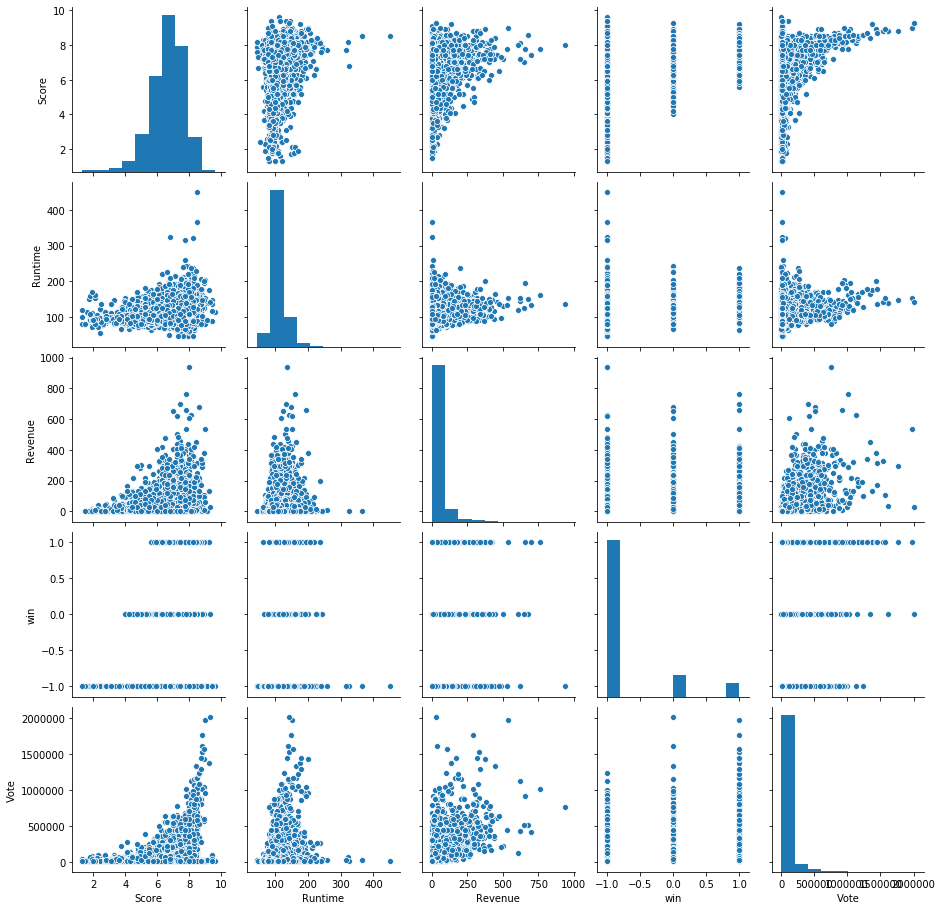

In [31]:
# Построение графиков зависимости

attributes = ['Score', 'Runtime', 'Revenue', 'win','Vote']
sns_plot=sns.pairplot(Data[attributes])
sns_plot.savefig('dependences.png')

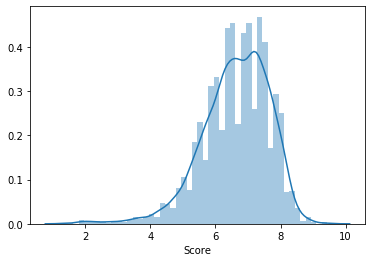

In [32]:
sns.distplot(Data.Score)

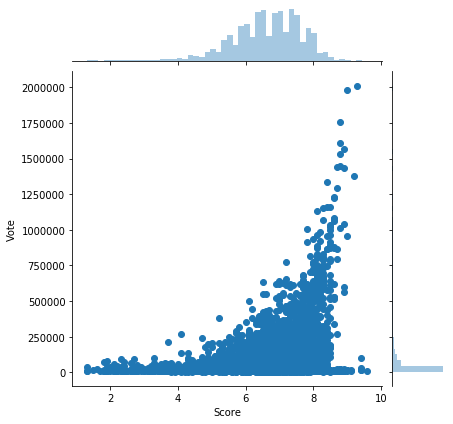

In [33]:
sns.jointplot(Data.Score, Data.Vote)

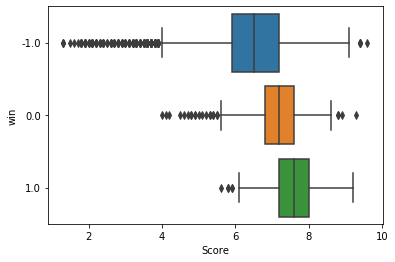

In [34]:
sns.boxplot(y="win", x="Score", data=Data, orient="h")

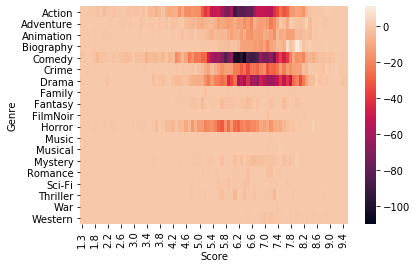

In [35]:
info = Data.pivot_table(
                        index='Genre', 
                        columns='Score', 
                        values='win', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(info)

## Работа с различными методами классификации

In [36]:
Data=Data.dropna()
from sklearn.model_selection import train_test_split
train, test = train_test_split(Data, test_size=0.3)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2242 entries, 9018 to 6700
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     2242 non-null   object 
 1   Year      2242 non-null   int64  
 2   Score     2242 non-null   float64
 3   Genre     2242 non-null   object 
 4   Vote      2242 non-null   int64  
 5   Director  2242 non-null   object 
 6   Runtime   2242 non-null   int64  
 7   Revenue   2242 non-null   float64
 8   Oscar     2242 non-null   float64
 9   Guild     2242 non-null   float64
 10  Globe     2242 non-null   float64
 11  win       2242 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 227.7+ KB


In [37]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X=train[['Score', 'Revenue', 'Vote']]
y=train.Oscar
#X=train['Score']
#y=train.winner
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
expected = test.Oscar
predicted = model.predict(test[['Score', 'Revenue', 'Vote']])
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted,labels=[1,0,-1]))

              precision    recall  f1-score   support

        -1.0       0.84      0.99      0.91      1875
         0.0       0.29      0.03      0.05       225
         1.0       0.67      0.06      0.10       142

    accuracy                           0.84      2242
   macro avg       0.60      0.36      0.36      2242
weighted avg       0.78      0.84      0.77      2242

[[   8    7  127]
 [   1    6  218]
 [   3    8 1864]]


#### Из-за низкого показателя recall, было решено отменить деление на 3 класса

## Преобразование в задачу бинарной классификации - Наличие или отсутствие премии

In [39]:
BinarData = Data
d = {-1 : False, 0: False, 1: True}
#BinarData[['win','Oscar','Befta','Globe']] = BinarData[['win','Oscar','Befta','Globe']].map(d)
BinarData['win'] = BinarData['win'].map(d)
BinarData['Oscar'] = BinarData['Oscar'].map(d)
BinarData['Guild'] = BinarData['Guild'].map(d)
BinarData['Globe'] = BinarData['Globe'].map(d)
train, test = train_test_split(BinarData, test_size=0.2)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1495 entries, 3616 to 8602
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     1495 non-null   object 
 1   Year      1495 non-null   int64  
 2   Score     1495 non-null   float64
 3   Genre     1495 non-null   object 
 4   Vote      1495 non-null   int64  
 5   Director  1495 non-null   object 
 6   Runtime   1495 non-null   int64  
 7   Revenue   1495 non-null   float64
 8   Oscar     1495 non-null   bool   
 9   Guild     1495 non-null   bool   
 10  Globe     1495 non-null   bool   
 11  win       1495 non-null   bool   
dtypes: bool(4), float64(2), int64(3), object(3)
memory usage: 111.0+ KB


In [40]:
model = LogisticRegression()
X=train[['Score', 'Revenue', 'Vote']]
y=train.win
#X=train['Score']
#y=train.winner
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
expected = test.win
predicted = model.predict(test[['Score', 'Revenue', 'Vote']])
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted,labels=[True,False]))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1388
        True       0.62      0.05      0.09       107

    accuracy                           0.93      1495
   macro avg       0.78      0.52      0.53      1495
weighted avg       0.91      0.93      0.90      1495

[[   5  102]
 [   3 1385]]


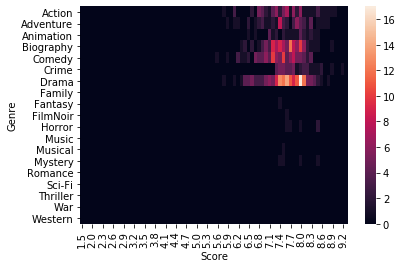

In [42]:
info = BinarData.pivot_table(
                        index='Genre', 
                        columns='Score', 
                        values='win', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(info)

In [40]:

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
X=train[['Score', 'Revenue', 'Vote']]
y=train.Oscar
expected = test.Oscar
#predicted = model.predict(test[['Score', 'Revenue', 'Vote']])
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)
# predict probabilities
probs = model.predict_proba(test[['Score', 'Revenue', 'Vote']])
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(expected, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(expected, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
directors=set(Data.Director)
len(directors)